In [22]:
import os
import numpy as np
from scipy import interpolate


In [12]:
def read_confusion_matrix(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        matrix = []
        for line in lines:
            row = [int(x) for x in line.strip('[] \n').split()]
            matrix.append(row)
        return np.array(matrix)

In [13]:
def calculate_metrics(confusion_matrix):
    [[tn, fp], [fn, tp]] = confusion_matrix
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return accuracy, precision, recall, f1_score

In [14]:
dataset_name = "UCEC"
data_types = [
    "mrna",
    "mirna",
    "methy",
    "methy_mirna",
    "mirna_mrna",
    "methy_mrna",
    "methy_mirna_mrna",
]
data_roots = ["methy", "mrna", "mirna"]

file_name = "confusion_matrix.txt"

results = {}
# Create evaluation_matrix folder
eval_folder = "evaluation_matrix"
if not os.path.exists(eval_folder):
    os.makedirs(eval_folder)

results_file_name = os.path.join(eval_folder, f"evaluation_results_{dataset_name}.txt")

results = {}

In [15]:
#Open the results file
with open(results_file_name, 'w') as results_file:
    results_file.write(f"Evaluation Results for {dataset_name}\n\n")

    for data_type in data_types:
        dir_name = f"logs/logs_{dataset_name}_{data_type}/plots"
        filepath = os.path.join(dir_name, file_name)
        
        if os.path.exists(filepath):
            print(f"\nProcessing: {data_type}")
            results_file.write(f"\nProcessing: {data_type}\n")
            try:
                conf_matrix = read_confusion_matrix(filepath)
                accuracy, precision, recall, f1_score = calculate_metrics(conf_matrix)
                
                results[data_type] = {
                    "confusion_matrix": conf_matrix,
                    "accuracy": accuracy,
                    "precision": precision,
                    "recall": recall,
                    "f1_score": f1_score
                }
                
                print(f"Confusion Matrix:\n{conf_matrix}")
                print(f"Accuracy: {accuracy:.4f}")
                print(f"Precision: {precision:.4f}")
                print(f"Recall: {recall:.4f}")
                print(f"F1 Score: {f1_score:.4f}")
                
                results_file.write(f"Confusion Matrix:\n{conf_matrix}\n")
                results_file.write(f"Accuracy: {accuracy:.4f}\n")
                results_file.write(f"Precision: {precision:.4f}\n")
                results_file.write(f"Recall: {recall:.4f}\n")
                results_file.write(f"F1 Score: {f1_score:.4f}\n")
            except Exception as e:
                error_message = f"Error processing {data_type}: {str(e)}"
                print(error_message)
                results_file.write(f"{error_message}\n")
        else:
            warning_message = f"\nWarning: File not found for {data_type}\nPath: {filepath}"
            print(warning_message)
            results_file.write(f"{warning_message}\n")

    # Write summary of all results
#     results_file.write("\nAll results:\n")
#     for data_type, metrics in results.items():
#         results_file.write(f"\n{data_type}:\n")
#         for metric, value in metrics.items():
#             if metric == "confusion_matrix":
#                 results_file.write(f"  {metric}:\n{value}\n")
#             else:
#                 results_file.write(f"  {metric}: {value:.4f}\n")

# print(f"\nResults have been saved to {results_file_name}")


Processing: mrna
Confusion Matrix:
[[10 17]
 [ 4 76]]
Accuracy: 0.8037
Precision: 0.8172
Recall: 0.9500
F1 Score: 0.8786

Processing: mirna
Confusion Matrix:
[[ 9 18]
 [ 2 78]]
Accuracy: 0.8131
Precision: 0.8125
Recall: 0.9750
F1 Score: 0.8864

Processing: methy
Confusion Matrix:
[[18  9]
 [ 7 73]]
Accuracy: 0.8505
Precision: 0.8902
Recall: 0.9125
F1 Score: 0.9012

Processing: methy_mirna
Confusion Matrix:
[[14 13]
 [ 2 78]]
Accuracy: 0.8598
Precision: 0.8571
Recall: 0.9750
F1 Score: 0.9123

Processing: mirna_mrna
Confusion Matrix:
[[ 5 22]
 [ 0 80]]
Accuracy: 0.7944
Precision: 0.7843
Recall: 1.0000
F1 Score: 0.8791

Processing: methy_mrna
Confusion Matrix:
[[14 13]
 [ 1 79]]
Accuracy: 0.8692
Precision: 0.8587
Recall: 0.9875
F1 Score: 0.9186

Processing: methy_mirna_mrna
Confusion Matrix:
[[15 12]
 [ 3 77]]
Accuracy: 0.8598
Precision: 0.8652
Recall: 0.9625
F1 Score: 0.9112


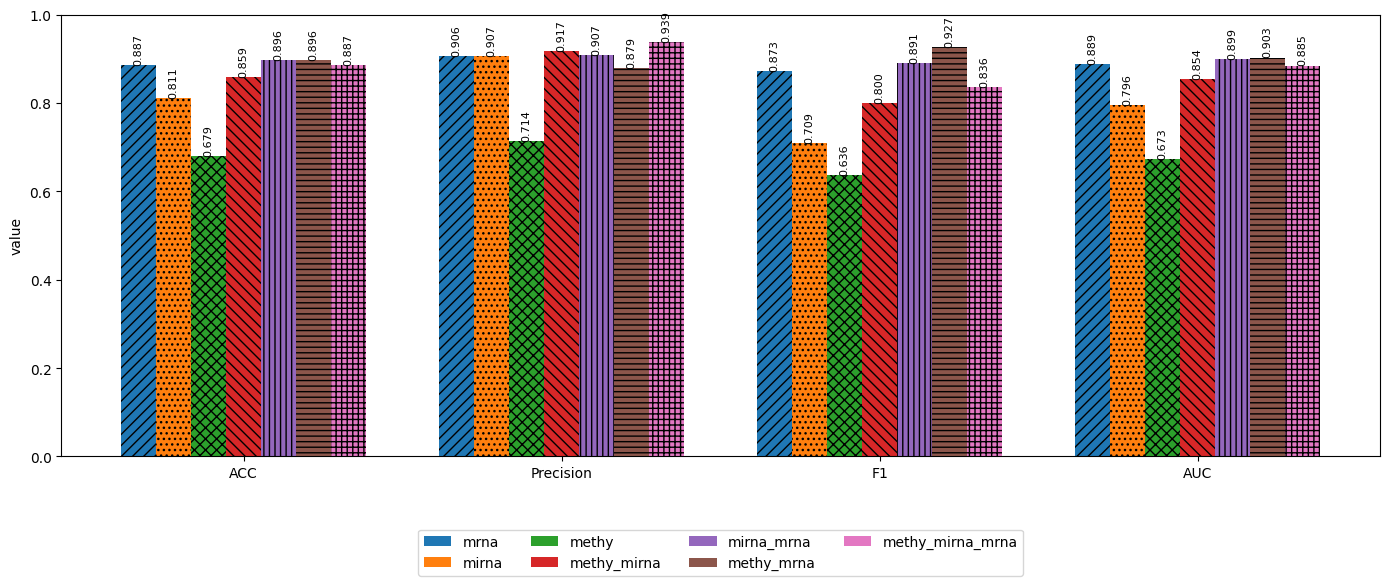

Bar graph has been saved as 'evaluation_metrics.png' in the evaluation_matrix folder.


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os

def read_evaluation_results(file_path):
    results = {}
    current_data_type = None
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('Processing:'):
                current_data_type = line.split(':')[1].strip()
                results[current_data_type] = {}
            elif ':' in line:
                metric, value = line.split(':')
                metric = metric.strip()
                if metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
                    results[current_data_type][metric] = float(value)
    return results

# Path to the evaluation results file
eval_folder = "evaluation_matrix"
results_file = os.path.join(eval_folder, "evaluation_results_ROSMAP.txt")

# Read the results
results = read_evaluation_results(results_file)

# Prepare data for plotting
data_types = list(results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Set the width of each bar and the positions of the bars
width = 0.11
x = np.arange(len(metrics))

# Plot bars for each data type
for i, data_type in enumerate(data_types):
    values_for_type = [results[data_type][metric] for metric in metrics]
    bars = ax.bar(x + i*width, values_for_type, width, label=data_type)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', rotation=90, fontsize=8)

# Customize the plot
ax.set_ylabel('value')
ax.set_ylim(0, 1.0)
ax.set_xticks(x + width * 3)
ax.set_xticklabels(['ACC', 'Precision', 'F1', 'AUC'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# Use different patterns for the bars
patterns = ['///', '...', 'xxx', '\\\\\\', '|||', '---', '+++']
for i, bar in enumerate(ax.patches):
    bar.set_hatch(patterns[i // len(metrics)])

plt.tight_layout()
plt.savefig(os.path.join(eval_folder, 'evaluation_metrics_ROSMAP_new.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"Bar graph has been saved as 'evaluation_metrics.png' in the {eval_folder} folder.")



# x = np.arange(len(data_types))  # the label locations
# width = 0.2  # the width of the bars
# multiplier = 0

# fig, ax = plt.subplots(figsize=(15, 8))

# for metric in metrics:
#     offset = width * multiplier
#     rects = ax.bar(x + offset, [results[dt][metric] for dt in data_types], width, label=metric)
#     ax.bar_label(rects, fmt='{:.2f}', padding=3, rotation=90, fontsize=8)
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Evaluation Metrics by Data Type for UCEC')
# ax.set_xticks(x + width * 1.5)
# ax.set_xticklabels(data_types, rotation=45, ha='right')
# ax.legend(loc='upper left', ncols=4)
# ax.set_ylim(0, 1)  # Set y-axis limit from 0 to 1

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.savefig(os.path.join(eval_folder, 'evaluation_metrics_UCEC.png'), dpi=300, bbox_inches='tight')
# plt.show()

# print(f"Bar graph has been saved as 'evaluation_metrics_comparison.png' in the {eval_folder} folder.")
            

In [7]:
# def read_evaluation_results(file_path):
#     results = {}
#     current_data_type = None
#     with open(file_path, 'r') as file:
#         for line in file:
#             if line.startswith('Processing:'):
#                 current_data_type = line.split(':')[1].strip()
#                 results[current_data_type] = {}
#             elif 'Confusion Matrix:' in line:
#                 matrix = []
#                 for _ in range(2):  # Read next two lines for 2x2 matrix
#                     matrix_line = next(file).strip()
#                     matrix.append([int(x) for x in matrix_line.strip('[]').split()])
#                 results[current_data_type]['Confusion Matrix'] = np.array(matrix)
#             elif ':' in line:
#                 metric, value = line.split(':')
#                 metric = metric.strip()
#                 if metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
#                     results[current_data_type][metric] = float(value)
#     return results

# def calculate_roc_points(confusion_matrix):
#     [[tn, fp], [fn, tp]] = confusion_matrix
#     tpr = tp / (tp + fn)
#     fpr = fp / (fp + tn)
#     return fpr, tpr

# # Path to the evaluation results file
# eval_folder = "evaluation_matrix"
# results_file = os.path.join(eval_folder, "evaluation_results_ROSMAP.txt")

# # Read the results
# results = read_evaluation_results(results_file)

# # Prepare data for plotting
# data_types = list(results.keys())
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# # Bar Graph
# x = np.arange(len(data_types))
# width = 0.2
# multiplier = 0

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16))

# for metric in metrics:
#     offset = width * multiplier
#     rects = ax1.bar(x + offset, [results[dt][metric] for dt in data_types], width, label=metric)
#     ax1.bar_label(rects, fmt='{:.2f}', padding=3, rotation=90, fontsize=8)
#     multiplier += 1

# ax1.set_ylabel('Scores')
# ax1.set_title('Evaluation Metrics by Data Type for ROSMAP')
# ax1.set_xticks(x + width * 1.5)
# ax1.set_xticklabels(data_types, rotation=45, ha='right')
# ax1.legend(loc='upper left', ncols=4)
# ax1.set_ylim(0, 1)

# # ROC Curve
# colors = plt.cm.rainbow(np.linspace(0, 1, len(data_types)))
# for data_type, color in zip(data_types, colors):
#     fpr, tpr = calculate_roc_points(results[data_type]['Confusion Matrix'])
#     ax2.plot(fpr, tpr, 'o', label=data_type, color=color, markersize=10)
#     ax2.plot([0, fpr, 1], [0, tpr, 1], '-', color=color, alpha=0.5)

# ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
# ax2.set_xlim([0.0, 1.0])
# ax2.set_ylim([0.0, 1.05])
# ax2.set_xlabel('False Positive Rate')
# ax2.set_ylabel('True Positive Rate')
# ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
# ax2.legend(loc="lower right")

# plt.tight_layout()
# plt.savefig(os.path.join(eval_folder, 'evaluation_metrics_and_roc.png'), dpi=300, bbox_inches='tight')
# plt.show()

# print(f"Bar graph and ROC curve have been saved as 'evaluation_metrics_and_roc.png' in the {eval_folder} folder.")

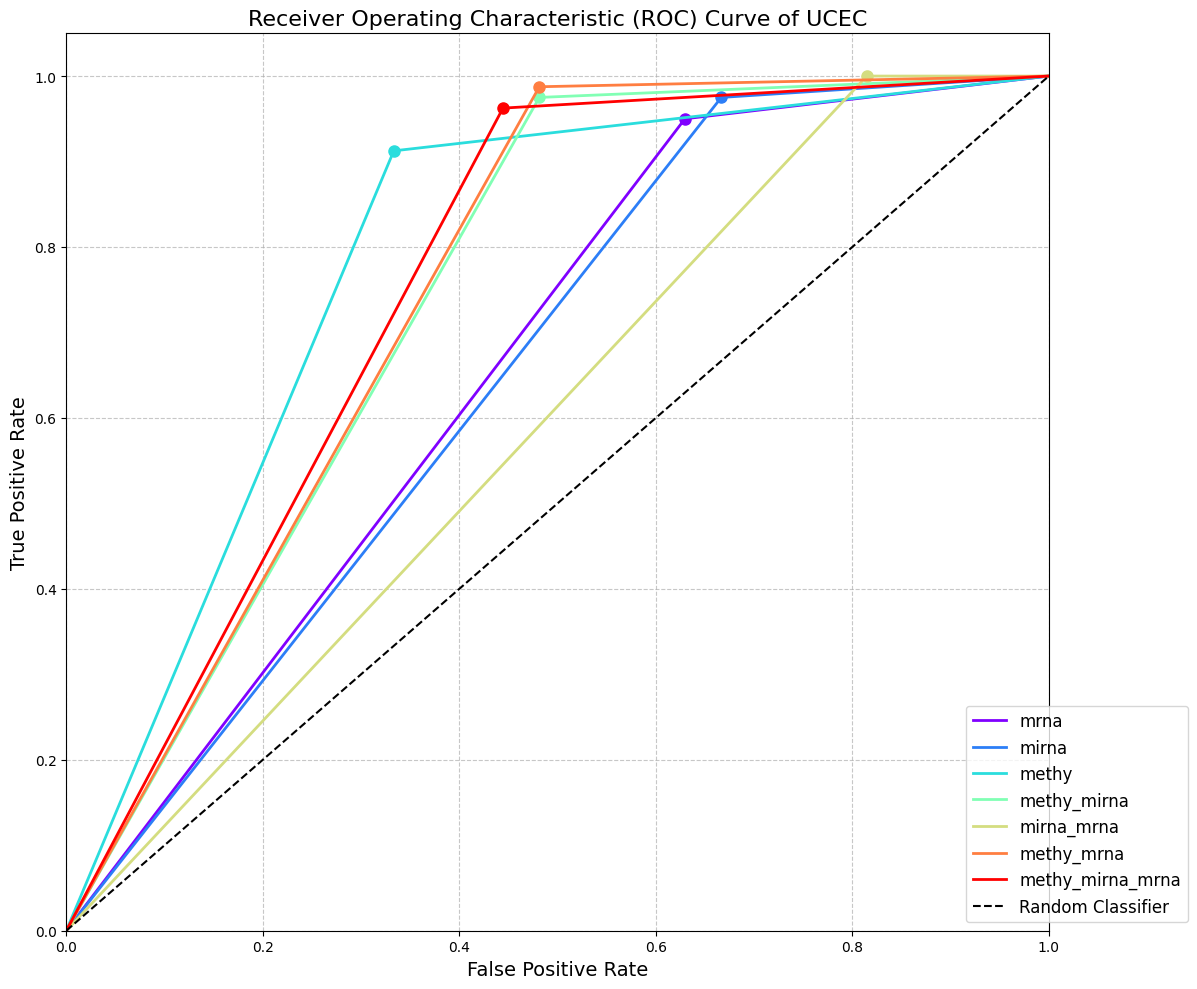

ROC curve has been saved as 'roc_curve_UCEC.png' in the evaluation_matrix folder.


In [29]:
def read_evaluation_results(file_path):
    results = {}
    current_data_type = None
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('Processing:'):
                current_data_type = line.split(':')[1].strip()
                results[current_data_type] = {}
            elif 'Confusion Matrix:' in line:
                matrix = []
                for _ in range(2):  # Read next two lines for 2x2 matrix
                    matrix_line = next(file).strip()
                    matrix.append([int(x) for x in matrix_line.strip('[]').split()])
                results[current_data_type]['Confusion Matrix'] = np.array(matrix)
    return results

def calculate_roc_points(confusion_matrix):
    [[tn, fp], [fn, tp]] = confusion_matrix
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return fpr, tpr

# Path to the evaluation results file
eval_folder = "evaluation_matrix"
results_file = os.path.join(eval_folder, "evaluation_results_UCEC.txt")

# Read the results
results = read_evaluation_results(results_file)

# Prepare data for plotting
data_types = list(results.keys())

# Create ROC Curve
plt.figure(figsize=(12, 10))
colors = plt.cm.rainbow(np.linspace(0, 1, len(data_types)))

for data_type, color in zip(data_types, colors):
    fpr, tpr = calculate_roc_points(results[data_type]['Confusion Matrix'])
    
    # Plot ROC curve
    plt.plot([0, fpr, 1], [0, tpr, 1], '-', label=data_type, color=color, linewidth=2)
    plt.plot(fpr, tpr, 'o', color=color, markersize=8)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve of UCEC', fontsize=16)

# Adjust legend
plt.legend(loc="lower right", fontsize=12, bbox_to_anchor=(1.15, 0))

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save
plt.tight_layout()
plt.savefig(os.path.join(eval_folder, 'roc_curve_UCEC.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"ROC curve has been saved as 'roc_curve_UCEC.png' in the {eval_folder} folder.")

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os

# def read_evaluation_results(file_path):
#     results = {}
#     current_data_type = None
#     with open(file_path, 'r') as file:
#         for line in file:
#             if line.startswith('Processing:'):
#                 current_data_type = line.split(':')[1].strip()
#                 results[current_data_type] = {}
#             elif ':' in line:
#                 metric, value = line.split(':')
#                 metric = metric.strip()
#                 if metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
#                     results[current_data_type][metric] = float(value)
#     return results

# # Path to the evaluation results file
# eval_folder = "evaluation_matrix"
# results_file = os.path.join(eval_folder, "evaluation_results_UCEC.txt")

# # Read the results
# results = read_evaluation_results(results_file)

# # Prepare data for plotting
# data_types = list(results.keys())
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# # Set up the plot
# fig, ax = plt.subplots(figsize=(12, 6))

# # Set the width of each bar and the positions of the bars
# width = 0.11
# x = np.arange(len(metrics))

# # Plot bars for each data type
# for i, data_type in enumerate(data_types):
#     values_for_type = [metrics[metric][i] for metric in metrics]
#     bars = ax.bar(x + i*width, values_for_type, width, label=data_type)
    
#     # Add value labels on top of each bar
#     for bar in bars:
#         height = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2., height,
#                 f'{height:.3f}', ha='center', va='bottom', rotation=90, fontsize=8)

# # Customize the plot
# ax.set_ylabel('value')
# ax.set_ylim(0, 1.0)
# ax.set_xticks(x + width * 3)
# ax.set_xticklabels(metrics)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# # Use different patterns for the bars
# patterns = ['///', '...', 'xxx', '\\\\\\', '|||', '---', '+++']
# for i, bar in enumerate(ax.patches):
#     bar.set_hatch(patterns[i // len(metrics)])

# plt.tight_layout()
# plt.show()